The purpose of this notebook is to read in and use the data to make figure one. This shows us how many PSMs under a certain cutoff that each tool is finding.

In [26]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl

Graphing how many peptides each tool finds at a specific cutoff

In [54]:
df = pd.read_csv("MokaPot/MegaScript.csv", low_memory=False,  header=[0,1])
df

In [56]:
df.drop(columns = {"Unnamed: 0_level_0"})

/Users/daishavanderwatt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


ScanNr MsFragger                                            \
      Unnamed: 1_level_1   peptide probability mokapot score mokapot q-value   
0                      6       NaN         NaN           NaN             NaN   
1                      7       NaN         NaN           NaN             NaN   
2                      9       NaN         NaN           NaN             NaN   
3                     11       NaN         NaN           NaN             NaN   
4                     13       NaN         NaN           NaN             NaN   
...                  ...       ...         ...           ...             ...   
35835              49331       NaN         NaN           NaN             NaN   
35836              49335       NaN         NaN           NaN             NaN   
35837              49342       NaN         NaN           NaN             NaN   
35838              49347       NaN         NaN           NaN             NaN   
35839              49354       NaN         NaN           NaN             NaN   

                              MsgfPlus                          \
      mokapot PEP              peptide    QValue mokapot score   
0             NaN  QQCGCQPKLCDYRCIWCQK  0.331900     -1.141648   
1             NaN                  NaN       NaN           NaN   
2             NaN             VEIPVLGR  0.433359     -1.458714   
3             NaN                  NaN       NaN           NaN   
4             NaN                  NaN       NaN           NaN   
...           ...                  ...       ...           ...   
35835         NaN                  NaN       NaN           NaN   
35836         NaN                  NaN       NaN           NaN   
35837         NaN            LYECSECGR  0.393170     -0.457595   
35838         NaN           DEDNDEDEER  0.472461     -1.452637   
35839         NaN             WHHEYQTR  0.148778     -0.530315   

                       ... MetaMorpheus                                    \
      mokapot q-value  ...       QValue PEP mokapot score mokapot q-value   
0            0.302455  ...          NaN NaN           NaN             NaN   
1                 NaN  ...          NaN NaN           NaN             NaN   
2            0.383631  ...          NaN NaN           NaN             NaN   
3                 NaN  ...          NaN NaN           NaN             NaN   
4                 NaN  ...          NaN NaN           NaN             NaN   
...               ...  ...          ...  ..           ...             ...   
35835             NaN  ...          NaN NaN           NaN             NaN   
35836             NaN  ...          NaN NaN           NaN             NaN   
35837        0.133164  ...          NaN NaN           NaN             NaN   
35838        0.381693  ...          NaN NaN           NaN             NaN   
35839        0.150900  ...          NaN NaN           NaN             NaN   

                    MaxQuant                                          \
      mokapot PEP    peptide       PEP mokapot score mokapot q-value   
0             NaN        NaN       NaN           NaN             NaN   
1             NaN  NEDEDSPNK  1.773420     -0.577871        0.137777   
2             NaN   VLLPAIKK  0.175843     -0.443765        0.099749   
3             NaN   SYVLALGR  1.870431     -0.293194        0.053161   
4             NaN        NaN       NaN      1.511118        0.000225   
...           ...        ...       ...           ...             ...   
35835         NaN        NaN       NaN      1.493624        0.000225   
35836         NaN        NaN       NaN      0.491633        0.000225   
35837         NaN        NaN       NaN           NaN             NaN   
35838         NaN        NaN       NaN      1.516223        0.000225   
35839         NaN        NaN       NaN           NaN             NaN   

                   
      mokapot PEP  
0             NaN  
1        0.408407  
2        0.405990  
3        0.386646  
4        0.000254  
...           ...  
35835    0.000279  

In [296]:
#This is returning NaN values, how do I get rid of them?
def get_msf_prob_len(df):
    msf_probability = df["MsFragger"]["probability"]
    msf_probability =  msf_probability.dropna()
    msf_under_cutoff = len(msf_probability.loc[msf_probability >= 0.99])
    #print(msf_probability.loc[msf_probability >= 0.99])
    return msf_under_cutoff

In [297]:
def get_mm_Qval_len(df):
    mm_qval = df["MetaMorpheus"]["QValue"] 
    mm_qval =  mm_qval.dropna() 
    mm_under_cutoff = len(mm_qval.loc[mm_qval <= 0.01])
    #print(mm_qval.loc[mm_qval <= 0.01])
    return mm_under_cutoff

In [298]:
def get_mm_PEP_len(df):
    mm_PEP = df["MetaMorpheus"]["PEP"] 
    mm_PEP =  mm_PEP.dropna() 
    value_under_cutoff = len(mm_PEP.loc[mm_PEP <= 0.01])
    #print(mm_PEP.loc[mm_PEP <= 0.01])
    return value_under_cutoff

In [299]:
def get_msg_Qval_len(df):
    msg_qval = df["MsgfPlus"]["QValue"] 
    msg_qval =  msg_qval.dropna() 
    msg_under_cutoff = len(msg_qval.loc[msg_qval <= 0.01])
    #print(msg_qval.loc[msg_qval <= 0.01])
    return msg_under_cutoff

In [300]:
def get_mq_PEP_len(df):
    mq_PEP = df["MaxQuant"]["PEP"] 
    mq_PEP =  mq_PEP.dropna() 
    mq_under_cutoff = len(mq_PEP.loc[mq_PEP <= 0.01])
    #print(mq_PEP.loc[mq_PEP <= 0.01])
    return mq_under_cutoff

In [301]:
def get_file_values(df):
    msf = get_msf_prob_len(df)
    MM_QVal = get_mm_Qval_len(df)
    MM_PEP = get_mm_PEP_len(df)
    msf_QVal = get_msg_Qval_len(df)
    MQ_PEP = get_mq_PEP_len(df)
    values_list = {"msf" : msf, "MM_QVal" : MM_QVal, "MM_PEP" : MM_PEP, "msf_QVal" : msf_QVal, "MQ_PEP" : MQ_PEP}
    return values_list

#put values into dictionary instead with name as key

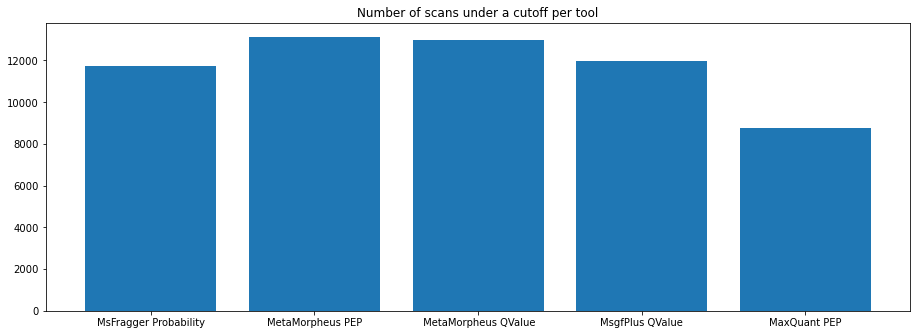

In [201]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
tools = ['MsFragger Probability', 'MetaMorpheus PEP', ' MetaMorpheus QValue', 'MsgfPlus QValue', 'MaxQuant PEP']
Unique_Scans = [msf, MM_PEP, MM_QVal, msf_QVal, MQ_PEP]
ax.bar(tools, Unique_Scans)
plt.title("Number of scans under a cutoff per tool")
plt.show()

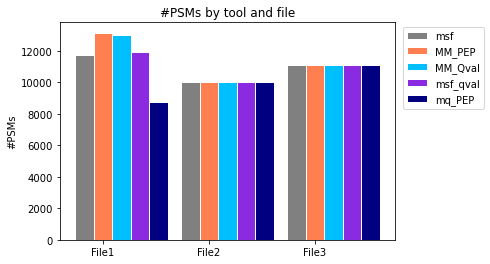

In [331]:
File1 = get_file_values(df)
 
# set width of bars
barWidth = 0.175
 
# set heights of bars
msf_prob = [File1['msf'], 10000, 11111]
MM_PEP = [File1['MM_PEP'], 10000, 11111]
MM_qval = [File1['MM_QVal'], 10000, 11111]
msg_qval = [File1['msf_QVal'], 10000, 11111]
mq_PEP = [File1['MQ_PEP'], 10000, 11111]
 
# Set position of bar on X axis
r1 = np.arange(len(msf_prob))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_prob, color='gray', width=barWidth, edgecolor='white', label='msf')
plt.bar(r2, MM_PEP, color='#FF7F50', width=barWidth, edgecolor='white', label='MM_PEP')
plt.bar(r3, MM_qval, color='#00BFFF', width=barWidth, edgecolor='white', label='MM_Qval')
plt.bar(r4, msg_qval, color='#8A2BE2', width=barWidth, edgecolor='white', label='msf_qval')
plt.bar(r5, mq_PEP, color='navy', width=barWidth, edgecolor='white', label='mq_PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel('#PSMs')
plt.title('#PSMs by tool and file')
plt.xticks([r + barWidth for r in range(len(msf_prob))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.28, 1))
plt.show()